In [10]:
import batch_processing

import pandas as pd

import fonctions

import gzip
import pickle as pkl

from os import listdir
from tqdm.notebook import tqdm
from os.path import isfile, join

import multiprocessing as mp
from multiprocessing import Process
import datetime
import collections
import matplotlib.pyplot as plt

from datetime import datetime as dt
import numpy as np

In [2]:
batch_path='/home/maxime/Desktop/RecSys2020/data/processed_batches'
batch_list = [f for f in listdir(batch_path) if isfile(join(batch_path, f))]
chunks = fonctions.chunkIt(batch_list, 8)

In [22]:
directory = '/home/maxime/Desktop/RecSys2020/data/batches/'

all_features = ["text_tokens", "hashtags", "tweet_id", 
                    "present_media", "present_links", 
                    "present_domains", "tweet_type","language", 
                    "tweet_timestamp", "engaged_with_user_id",
                    "engaged_with_user_follower_count", "engaged_with_user_following_count", 
                    "engaged_with_user_is_verified", "engaged_with_user_account_creation",
                    "engaging_user_id", "engaging_user_follower_count", 
                    "engaging_user_following_count", "engaging_user_is_verified",
                    "engaging_user_account_creation", "engagee_follows_engager"]
    
df = pd.read_csv(directory+'job_08.tsv', encoding="utf-8", sep='\x01', header=None)

labels = ['reply_timestamp','retweet_timestamp', 'retweet_with_comment_timestamp','like_timestamp']
df.columns = all_features+labels

df['tweet_timestamp']=[ dt.utcfromtimestamp(int(date)) for date in df['tweet_timestamp'] ]
df['end_of_week']= datetime.datetime(2020, 2, 13)

df['tweet_age'] = (df['end_of_week'] - df['tweet_timestamp']).dt.days
df.tweet_age.value_counts()

4    4483
2    4434
5    4393
3    4351
1    4291
6    4095
0    3951
7       2
Name: tweet_age, dtype: int64

In [11]:
def count_time_on_chunk(chunk,chunk_id):
    directory = '/home/maxime/Desktop/RecSys2020/data/processed_batches/'
    
    global_count = collections.Counter()
    iteration = 1
    for batch_file in chunk:  
        print(iteration)
        X, y = batch_processing.read_batch(directory, batch_file)
        count = collections.Counter(X['jour'])
        global_count = global_count + count
        iteration=iteration+1
        
    with gzip.open('/home/maxime/Desktop/RecSys2020/jour/jour_{}.pkl.gz'.format(chunk_id),'wb') as f:    
        pkl.dump(global_count,f)
        
    return True

In [8]:
if __name__ == '__main__':
    
    processes = [ mp.Process(target=count_time_on_chunk, args=(chunk,chunk_id) ) for chunk_id, chunk in enumerate(chunks) ]

    # Run processes
    for p in processes:
        p.start()
        
    #Stop the processes
    for p in processes:
        p.join() 

1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
13
12
13
13
13
13
13
13
14
13
14
14
14
14
14
15
14
14
15
15
15
15
15
16
15
15
16
16
16
16
16
17
16
16
17
17
17
17
17
18
17
18
17
18
18
18
18
19
18
18
19
19
19
19
19
20
19
20
19
20
20
20
20
21
20
20
21
21
21
21
21
22
21
21
22
22
22
22
22
23
22
22
23
23
23
23
23
24
23
23
24
24
24
24
24
25
24
24
25
25
25
25
25
26
25
26
25
26
26
26
26
27
27
26
26
27
27
27
27
28
28
27
27
28
28
28
28
29
29
28
28
29
29
29
29
30
30
29
29
30
30
30
30
31
31
30
30
31
31
31
31
32
32
31
31
32
32
32
32
33
33
32
32
33
33
33
33
34
34
33
33
34
34
34
34
35
35
34
34
35
35
35
35
36
36
35
35
36
36
36
36
37
37
36
36
37
37
37
37
38
38
37
37
38
38
38
38
39
39
38
38
39
39
39
39
40
40
39
39
40
40
40
40
41
41
40
40
41
41
41
41
42
42
41
41
42
42
42
42
43
43
42
42
43
43
43
44
43
44
43
43
44
44
44
44
45
45
44
44
45
45
45
4

285
283
283
284
284
285
284
285
286
285
284
284
285
286
285
286
286
287
285
285
286
287
286
287
288
287
286
286
287
288
287
288
289
287
288
287
288
289
288
289
288
290
289
288
289
290
289
290
289
291
289
290
290
291
290
291
290
292
290
291
291
292
291
291
292
293
291
292
292
293
292
292
293
294
292
293
293
294
293
293
294
295
293
294
294
295
294
294
295
296
294
295
295
296
295
295
296
297
295
296
296
296
297
296
297
298
296
297
297
297
297
298
298
299
298
298
297
298
298
299
299
300
299
299
298
299
299
300
301
300
300
300
299
300
300
301
302
301
301
301
300
301
301
302
302
303
302
302
301
302
302
303
304
303
303
303
302
303
303
305
304
304
304
304
303
304
304
305
306
305
305
305
304
305
305
306
307
306
306
306
305
306
306
307
308
307
307
307
306
307
307
308
308
309
308
308
307
308
308
309
310
309
309
309
308
309
309
311
310
310
310
310
309
310
310
312
311
311
311
311
311
310
311
312
313
312
312
312
312
311
312
313
314
313
313
313
313
312
313
314
314
315
314
314
313
314
314
315
316
315


541
539
540
540
540
540
542
540
542
540
541
541
541
541
543
541
541
543
542
542
542
542
544
542
542
544
543
543
543
543
545
543
545
543
544
544
544
544
546
544
546
544
545
545
545
545
547
547
545
545
546
546
546
546
548
548
546
546
547
547
547
547
549
549
547
547
548
548
548
548
550
548
550
548
549
549
549
549
551
549
551
549
550
550
550
550
552
550
552
550
551
551
551
551
553
551
551
553
552
552
552
554
552
552
552
554
553
553
553
555
553
553
555
553
554
554
554
556
554
554
556
554
555
555
555
557
555
557
555
555
556
556
558
556
556
557
556
556
558
557
559
557
557
558
557
559
558
557
560
558
558
558
560
559
558
559
561
559
559
559
559
561
560
560
562
560
560
560
560
562
561
561
563
561
561
561
563
561
562
562
564
562
562
562
563
562
564
565
563
563
563
563
564
563
565
566
564
564
564
564
565
566
564
567
565
565
565
565
566
567
565
568
566
566
566
566
567
568
566
569
567
567
567
567
569
567
568
568
568
568
568
568
569
569
569
569
570
569
569
570


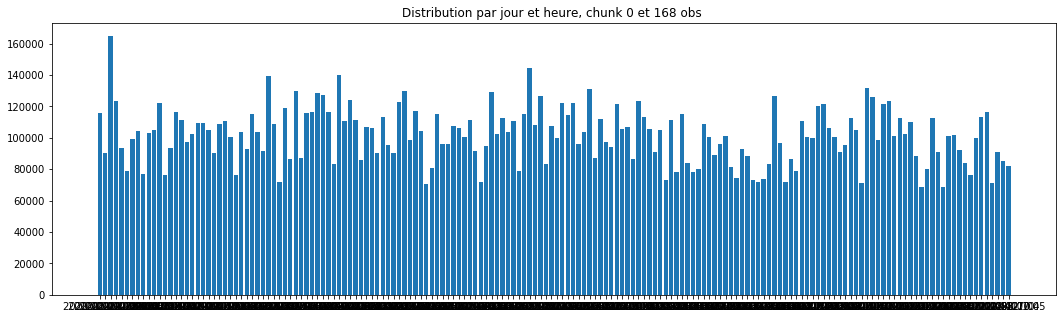

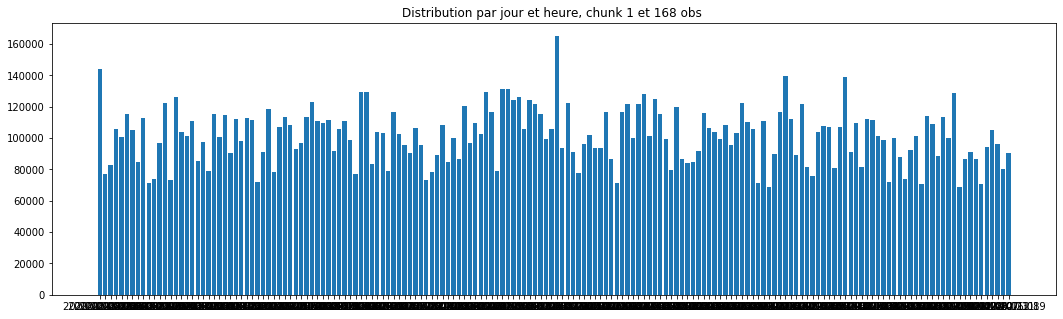

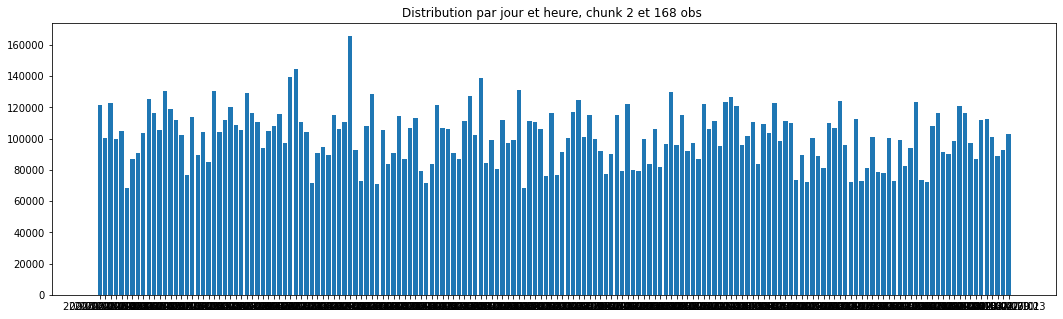

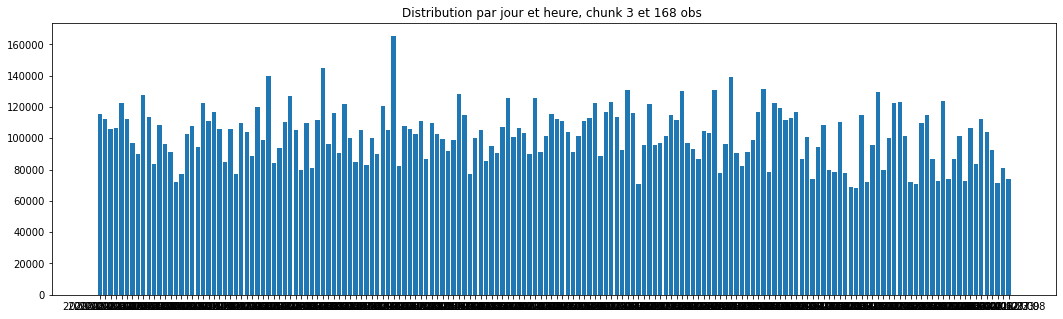

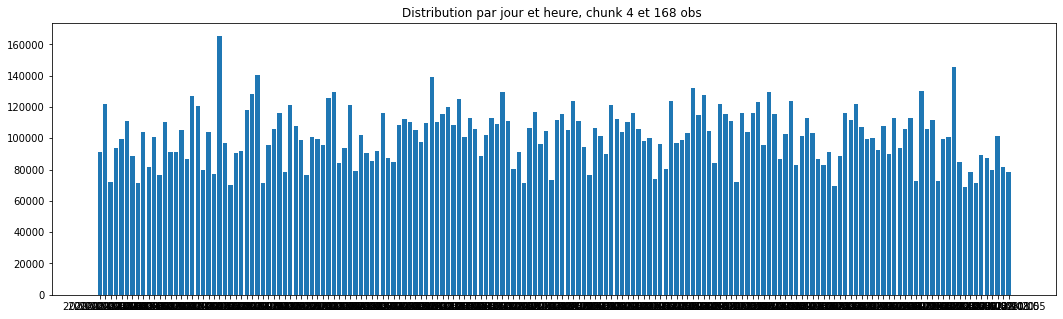

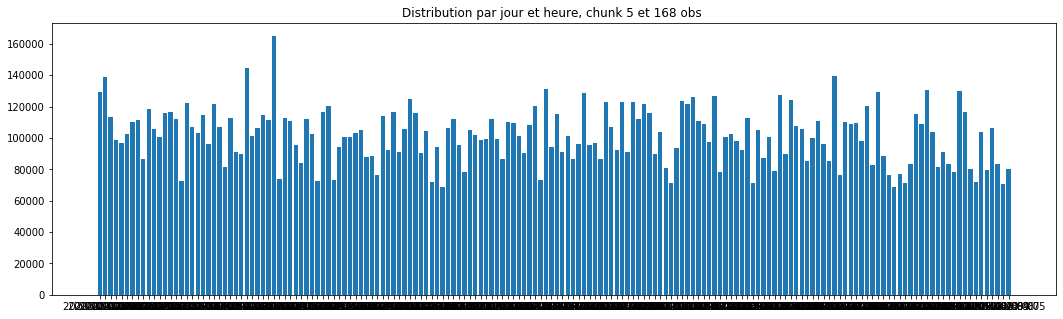

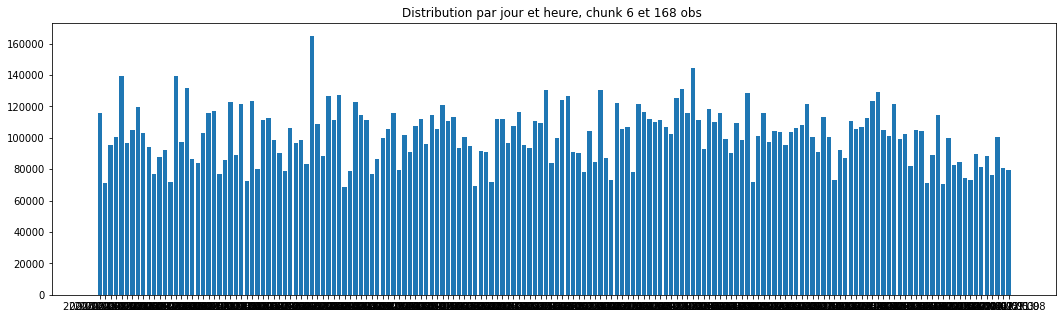

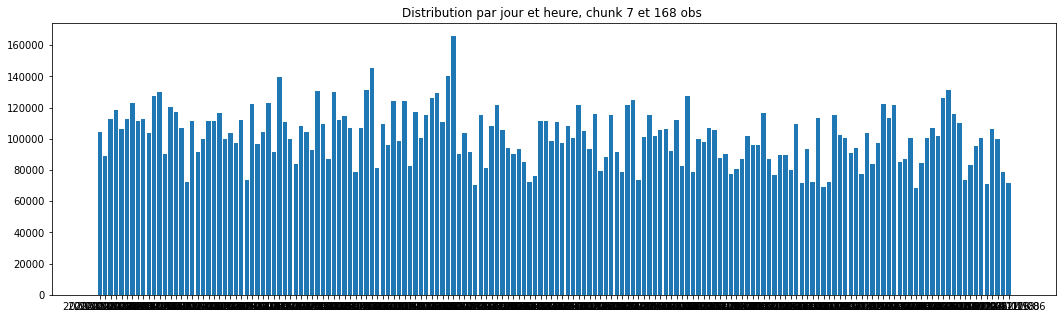

In [9]:
for chunk_id in range(8):
    
    with gzip.open('/home/maxime/Desktop/RecSys2020/jour_{}.pkl.gz'.format(chunk_id), 'rb') as f:
        global_count = pkl.load(f)
        
    
    f, ax = plt.subplots(figsize=(18,5))
    plt.title('Distribution par jour et heure, chunk {} et {} obs '.format(chunk_id, len(global_count.keys() ) ) )
    plt.bar(global_count.keys(), global_count.values())